# Installing packages

In [1]:
!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0
!pip install -q wordcloud

     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 6.4MB 17.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.4MB 19.5MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 2.1MB 29.4MB/s 
     |████████████████████████████████| 1.2MB 41.4MB/s 
     |████████████████████████████████| 3.3MB 44.6MB/s 
     |████████████████████████████████| 901kB 33.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [2]:
!pip install -q top2vec[sentence_transformers]

ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


# Import

In [5]:
import numpy as np


In [6]:
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

# Load data

In [8]:
df = pd.read_excel('Abstracts1.xlsx')

In [9]:
df.head(3)

Abstract
0  BACKGROUND: In December 2019, COVID-19 broke o...
1  BACKGROUND: The recent coronavirus disease (CO...
2  Hamad General Hospital Anticoagulation Clinic ...

In [11]:
docs= list(df.loc[:, "Abstract"].values)

In [13]:
docs[:5]

['BACKGROUND: In December 2019, COVID-19 broke out in Wuhan, China, leading to national and international disruptions in health care, business, education, transportation, and nearly every aspect of our daily lives. Artificial intelligence (AI) has been leveraged amid the COVID-19 pandemic; however, little is known about its use for supporting public health efforts. OBJECTIVE: This scoping review aims to explore how AI technology is being used during the COVID-19 pandemic, as reported in the literature. Thus, it is the first review that describes and summarizes features of the identified AI techniques and data sets used for their development and validation. METHODS: A scoping review was conducted following the guidelines of PRISMA-ScR (Preferred Reporting Items for Systematic Reviews and Meta-Analyses Extension for Scoping Reviews). We searched the most commonly used electronic databases (eg, MEDLINE, EMBASE, and PsycInfo) between April 10 and 12, 2020. These terms were selected based o

# Top2Vec

In [14]:
model=Top2Vec(docs, embedding_model='universal-sentence-encoder')

2021-05-01 23:20:23,034 - top2vec - INFO - Pre-processing documents for training
2021-05-01 23:20:24,239 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-05-01 23:20:42,392 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-05-01 23:20:45,026 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-05-01 23:21:00,529 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-01 23:21:00,579 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [15]:
model.get_num_topics()

10

In [17]:
topic_words, word_scores,topic_nums = model.get_topics(10)

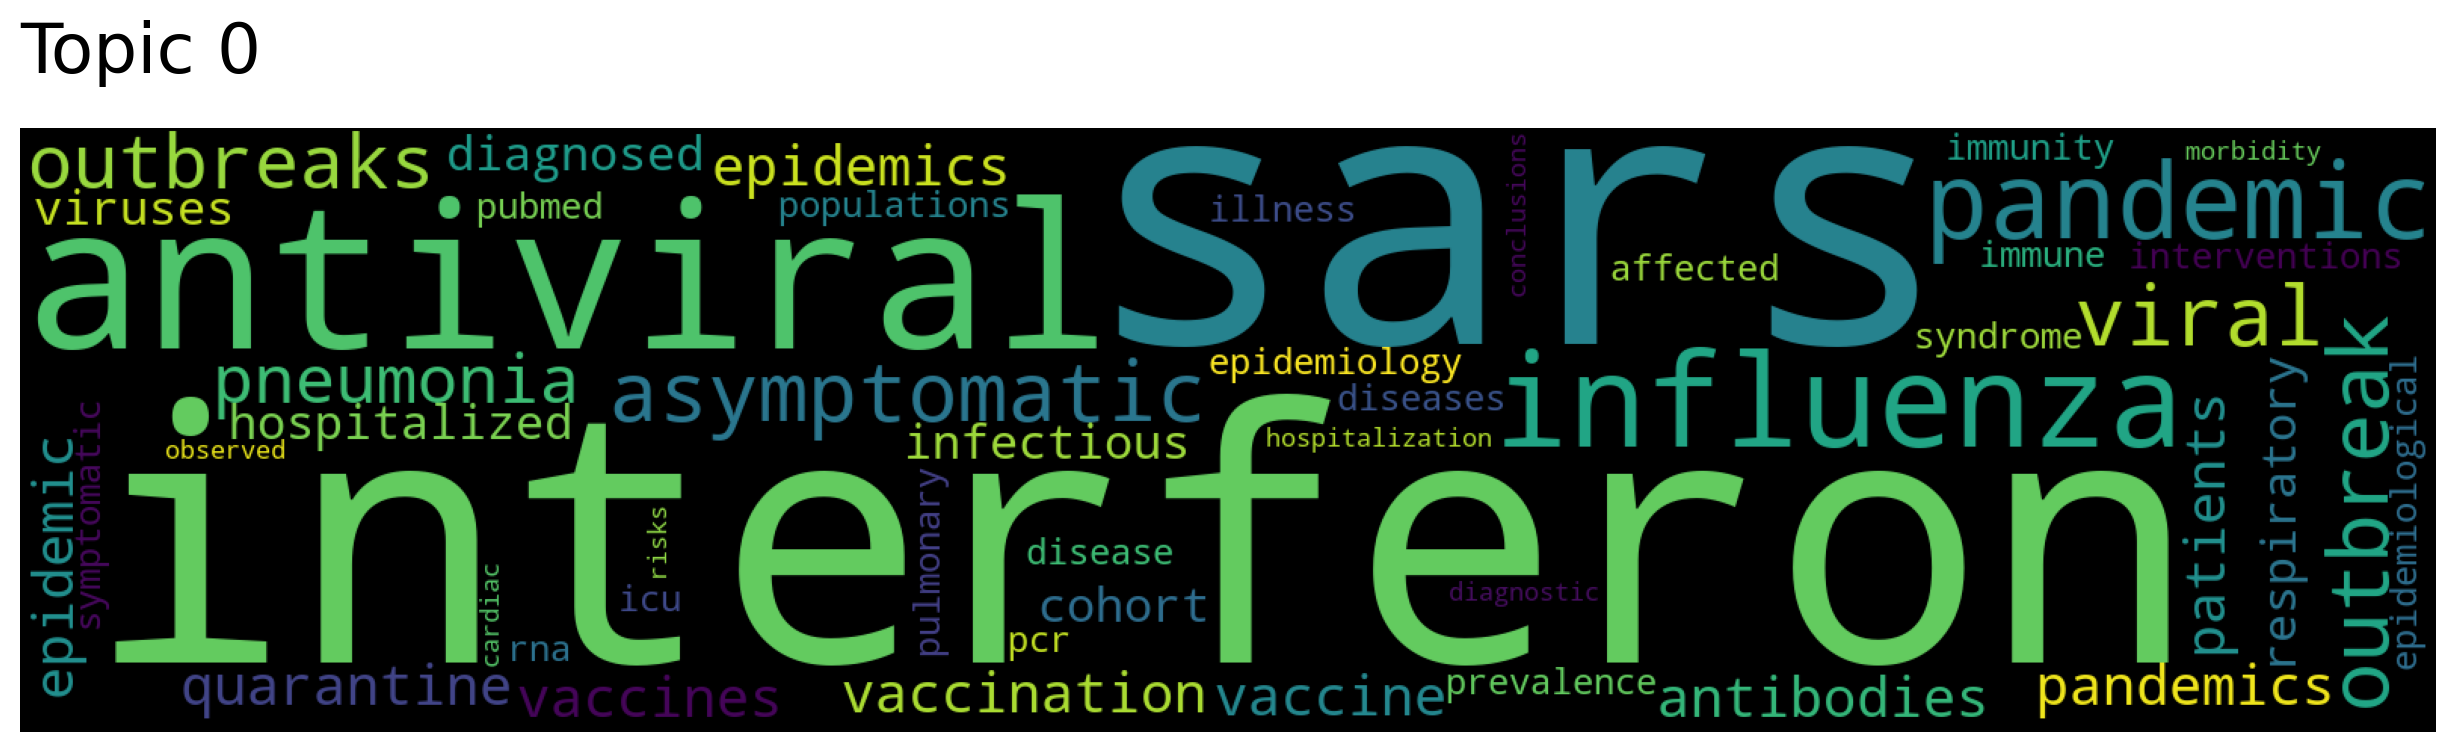

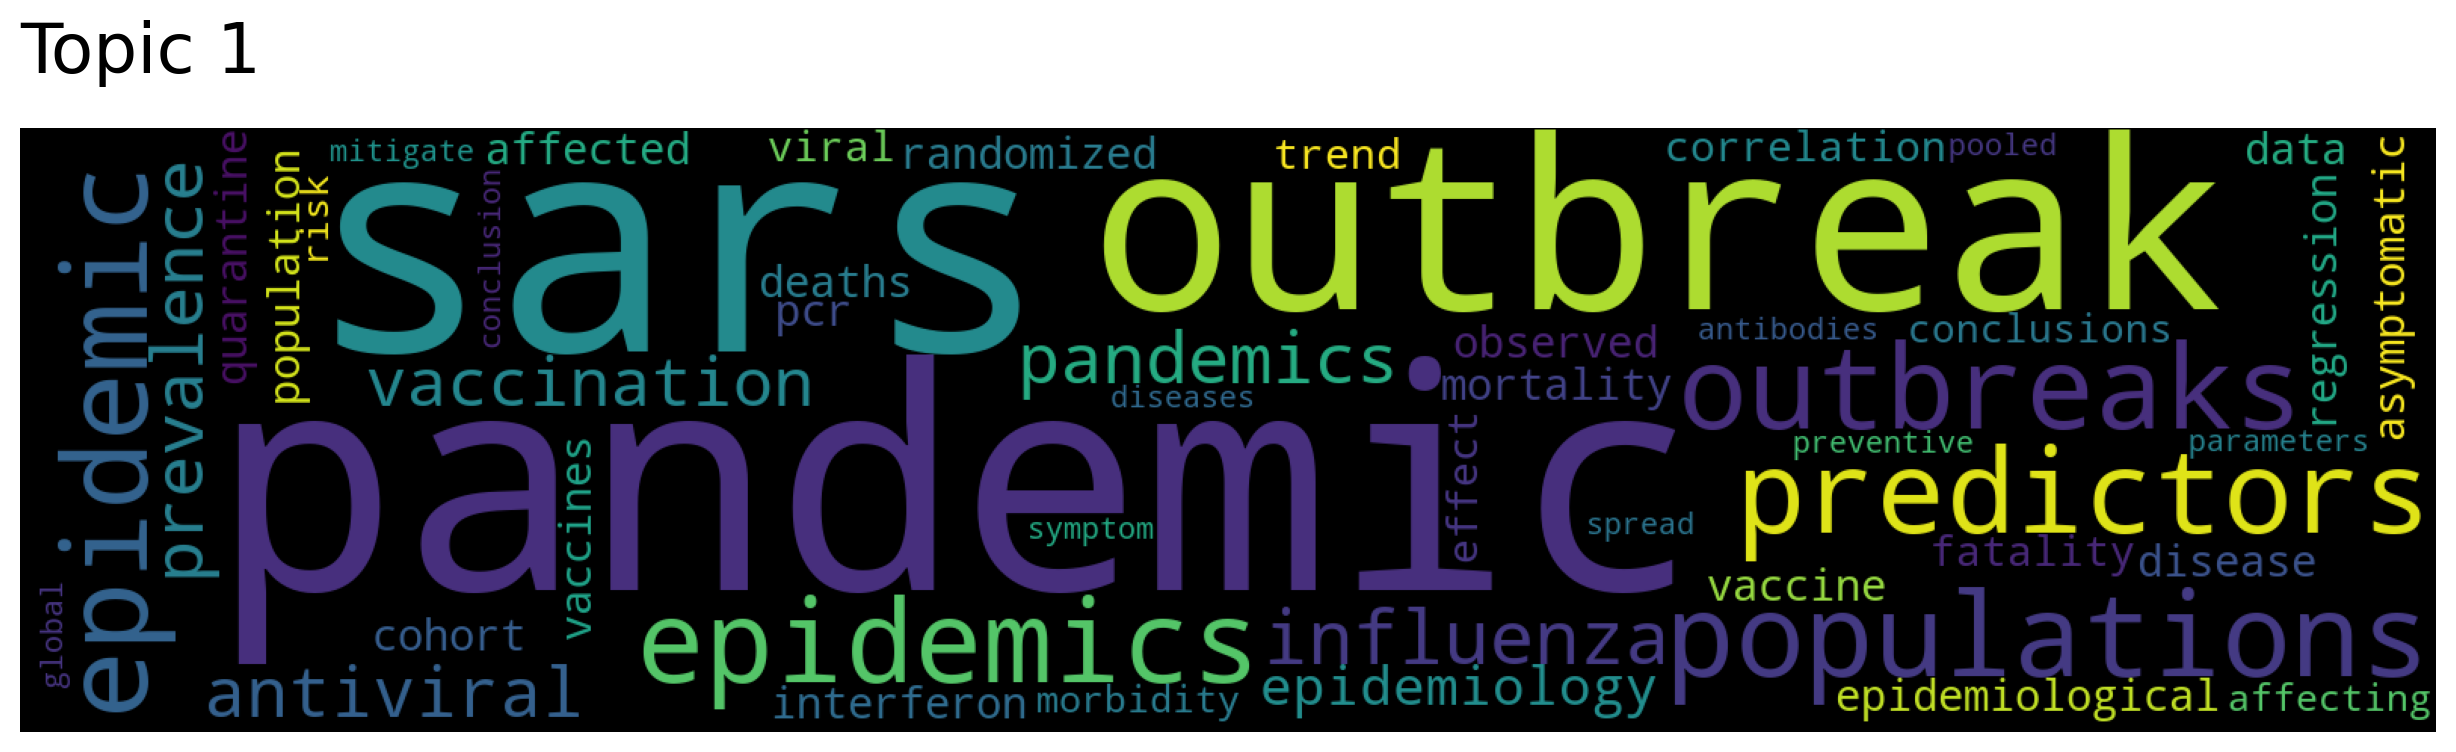

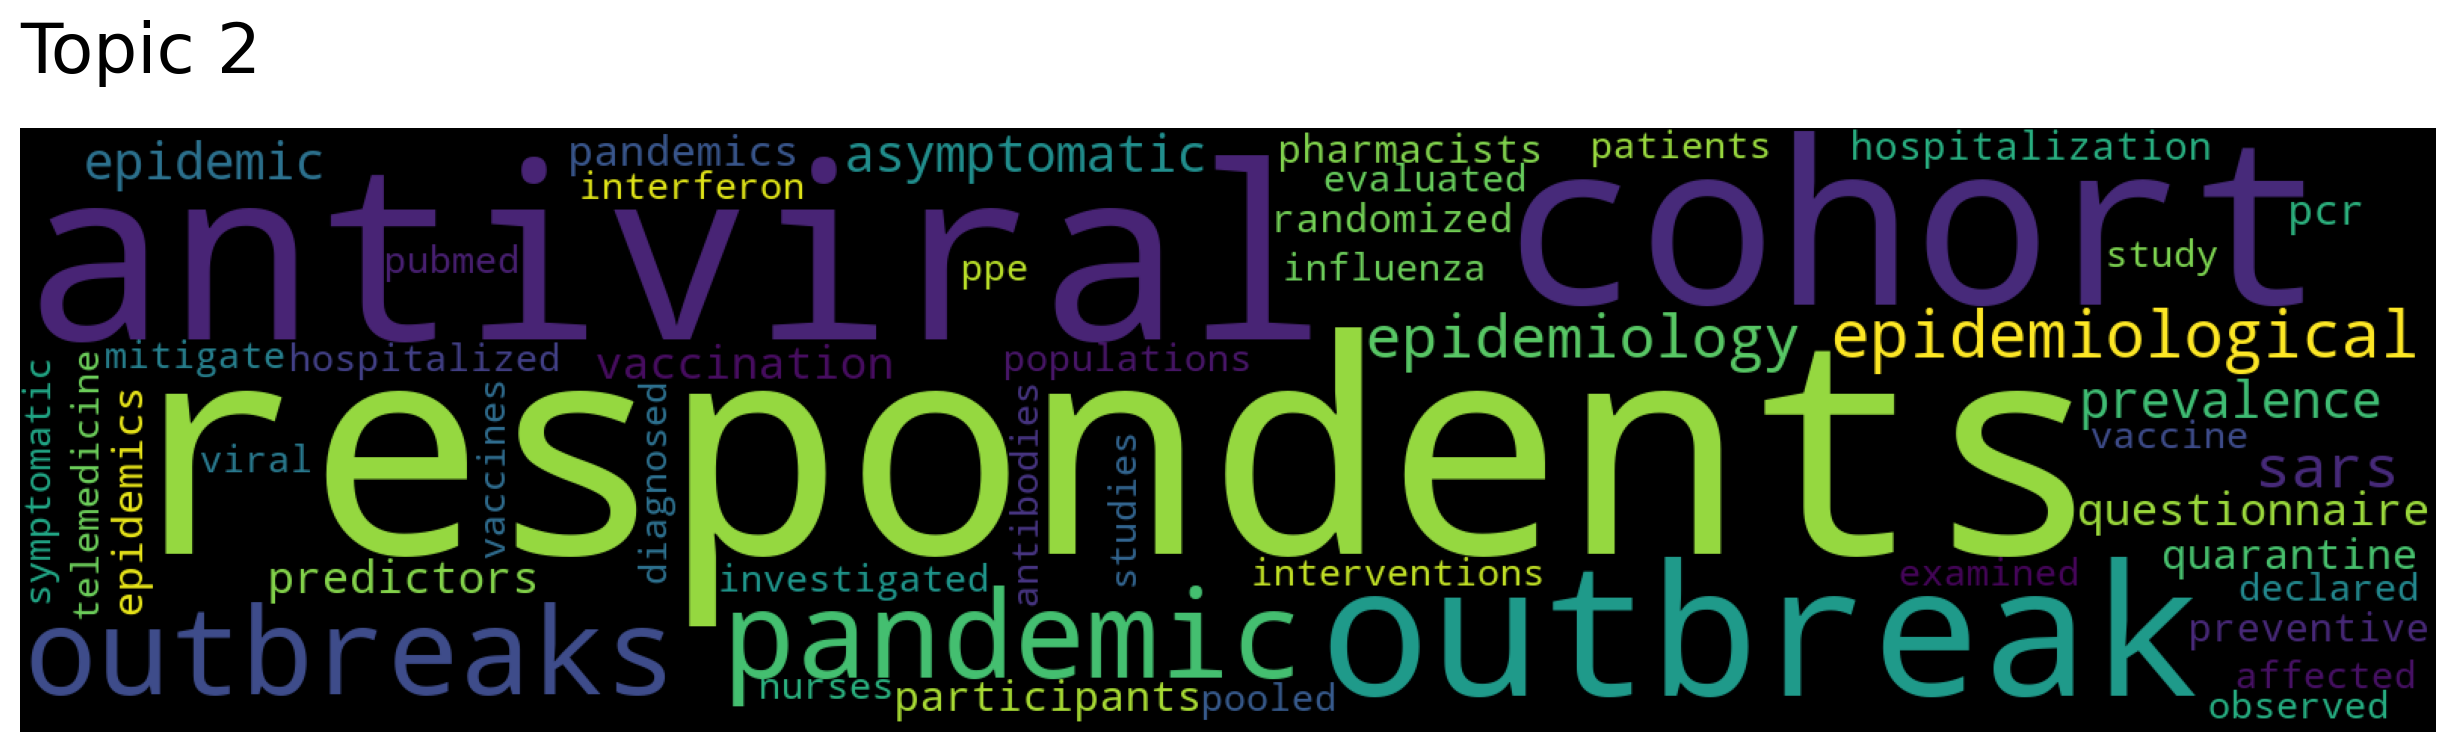

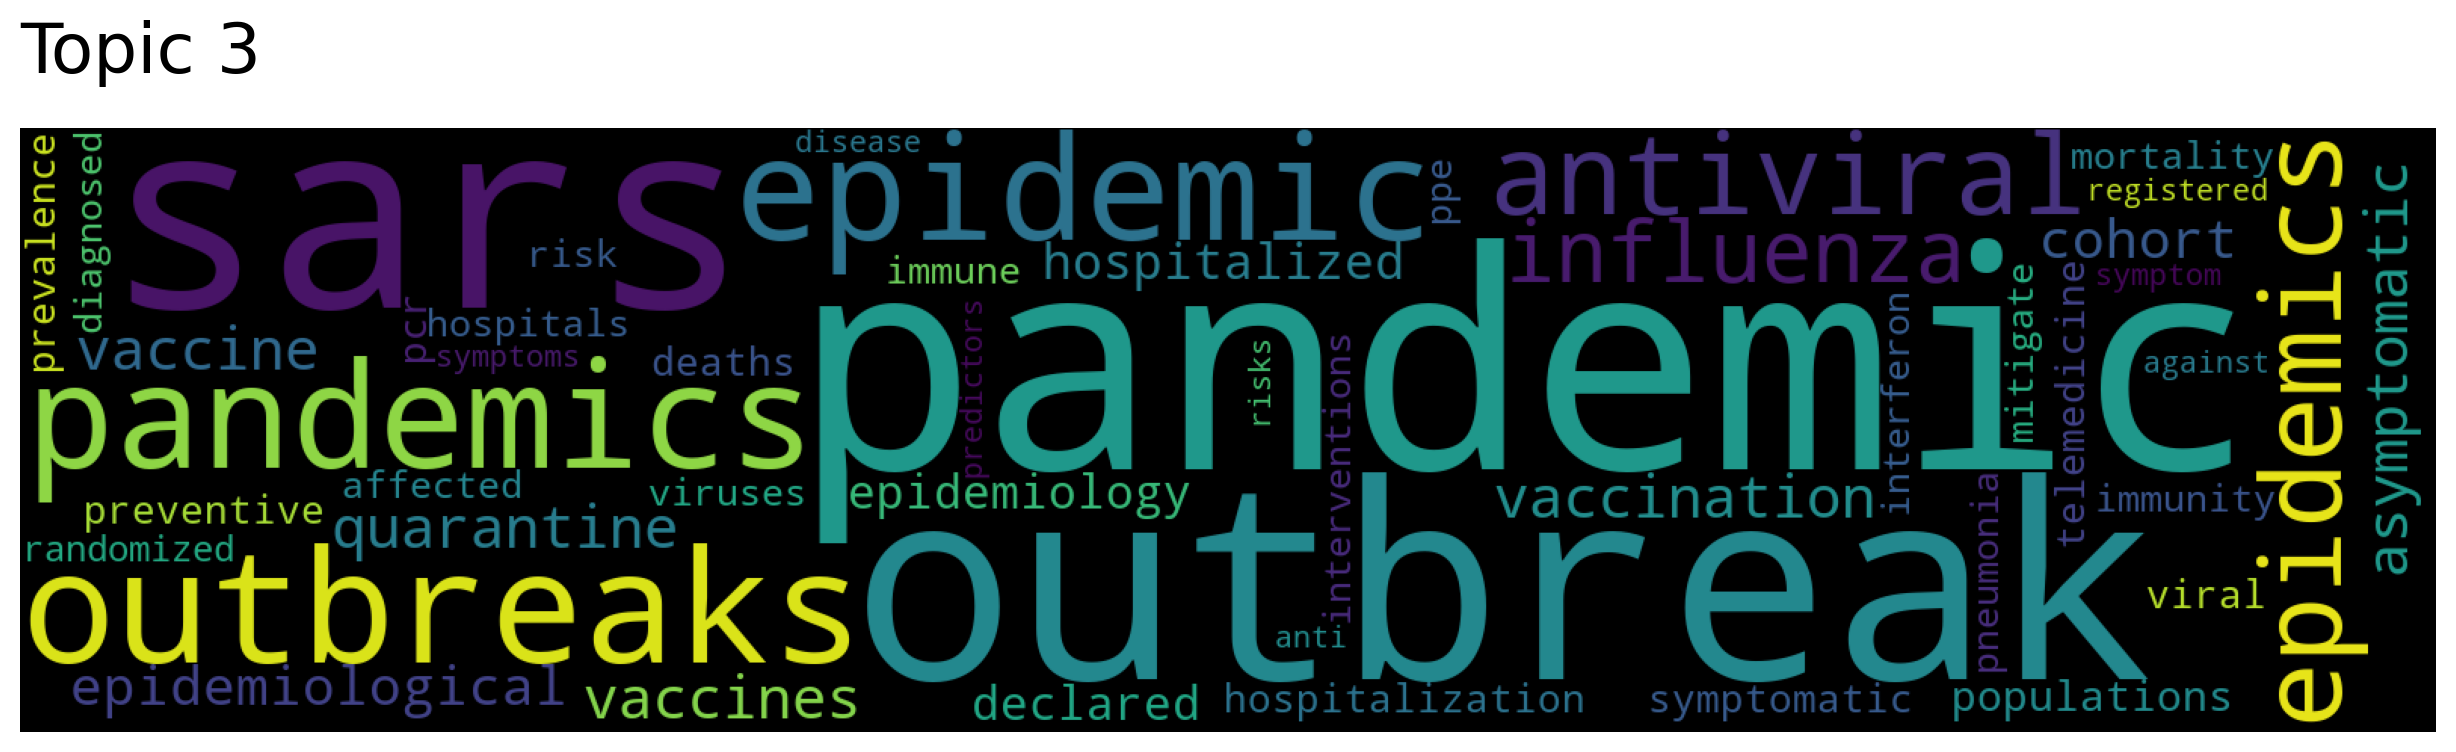

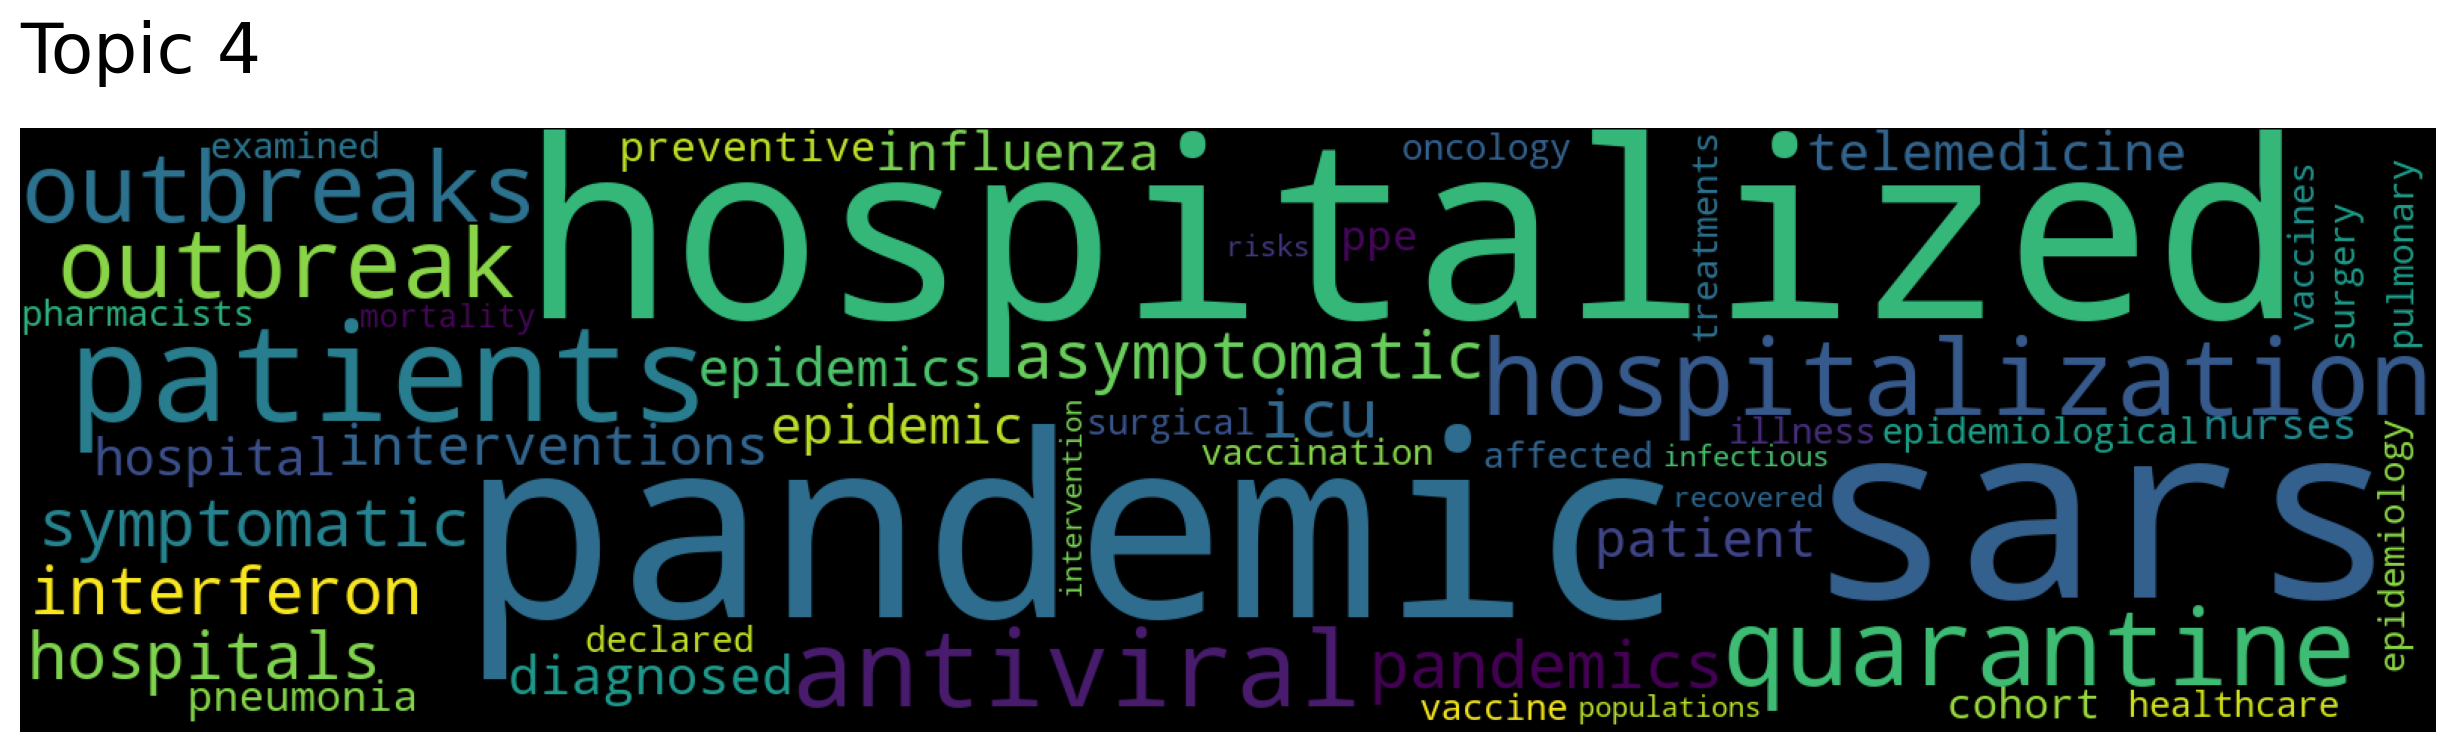

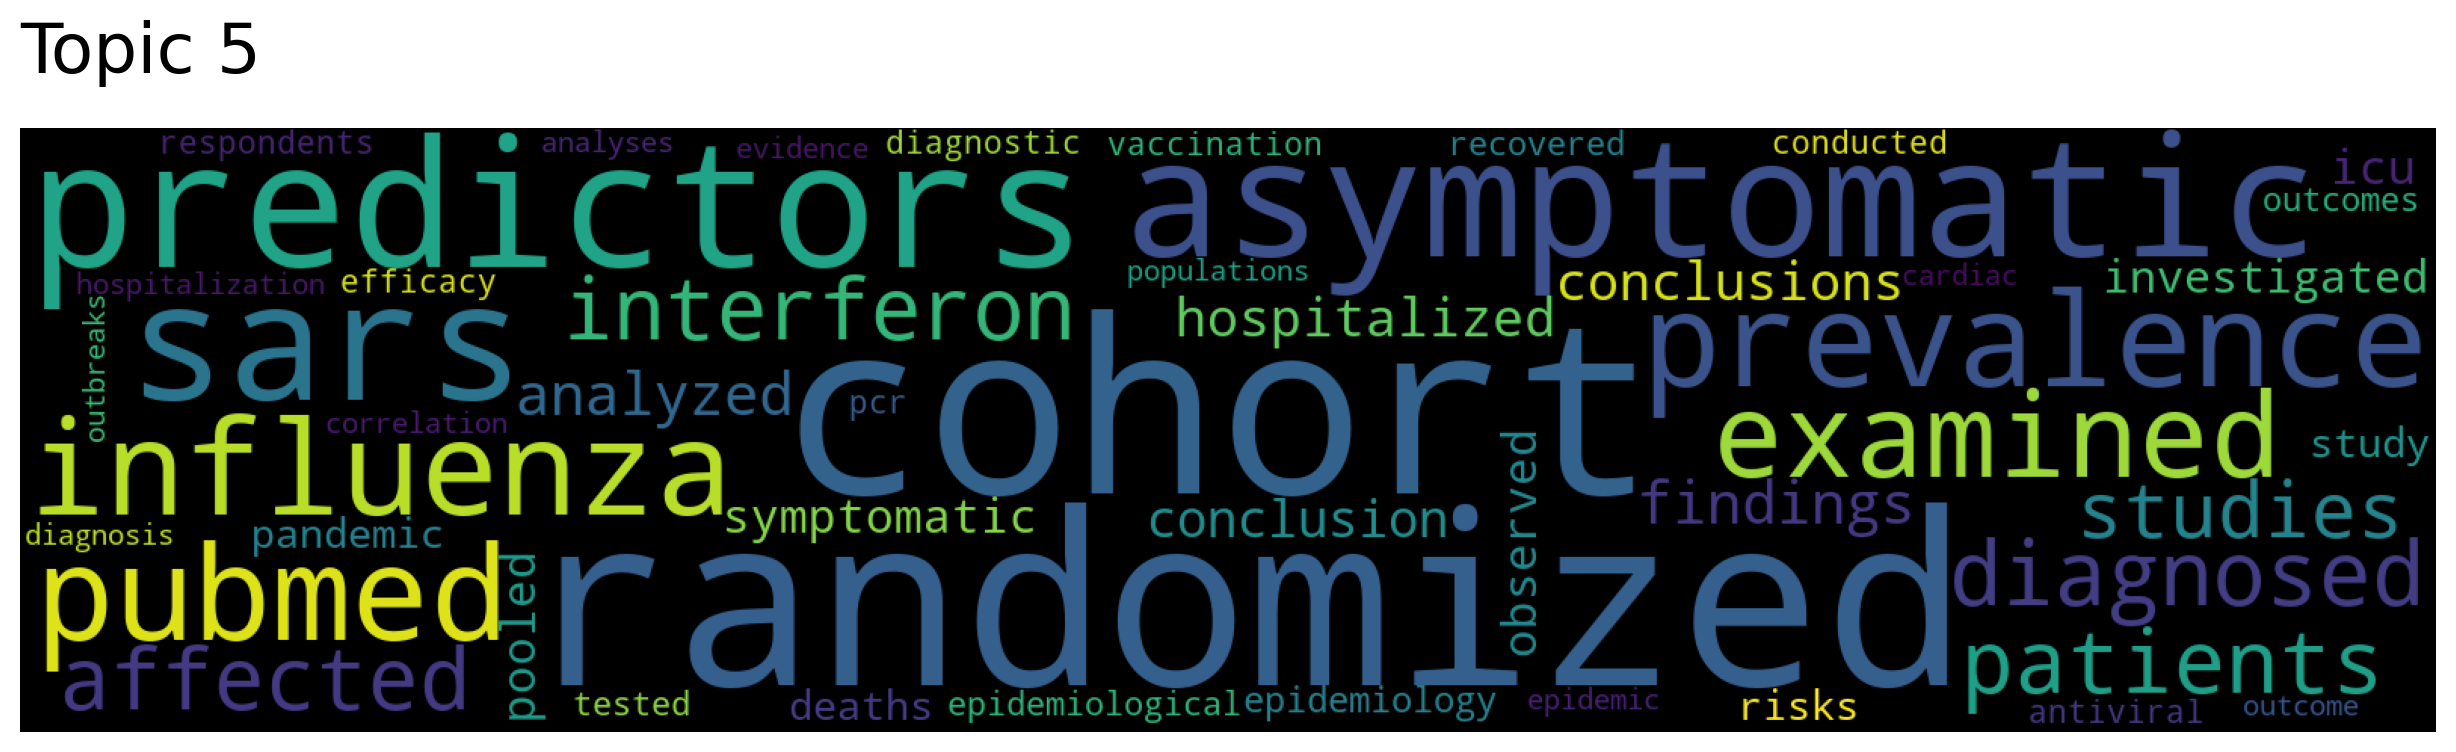

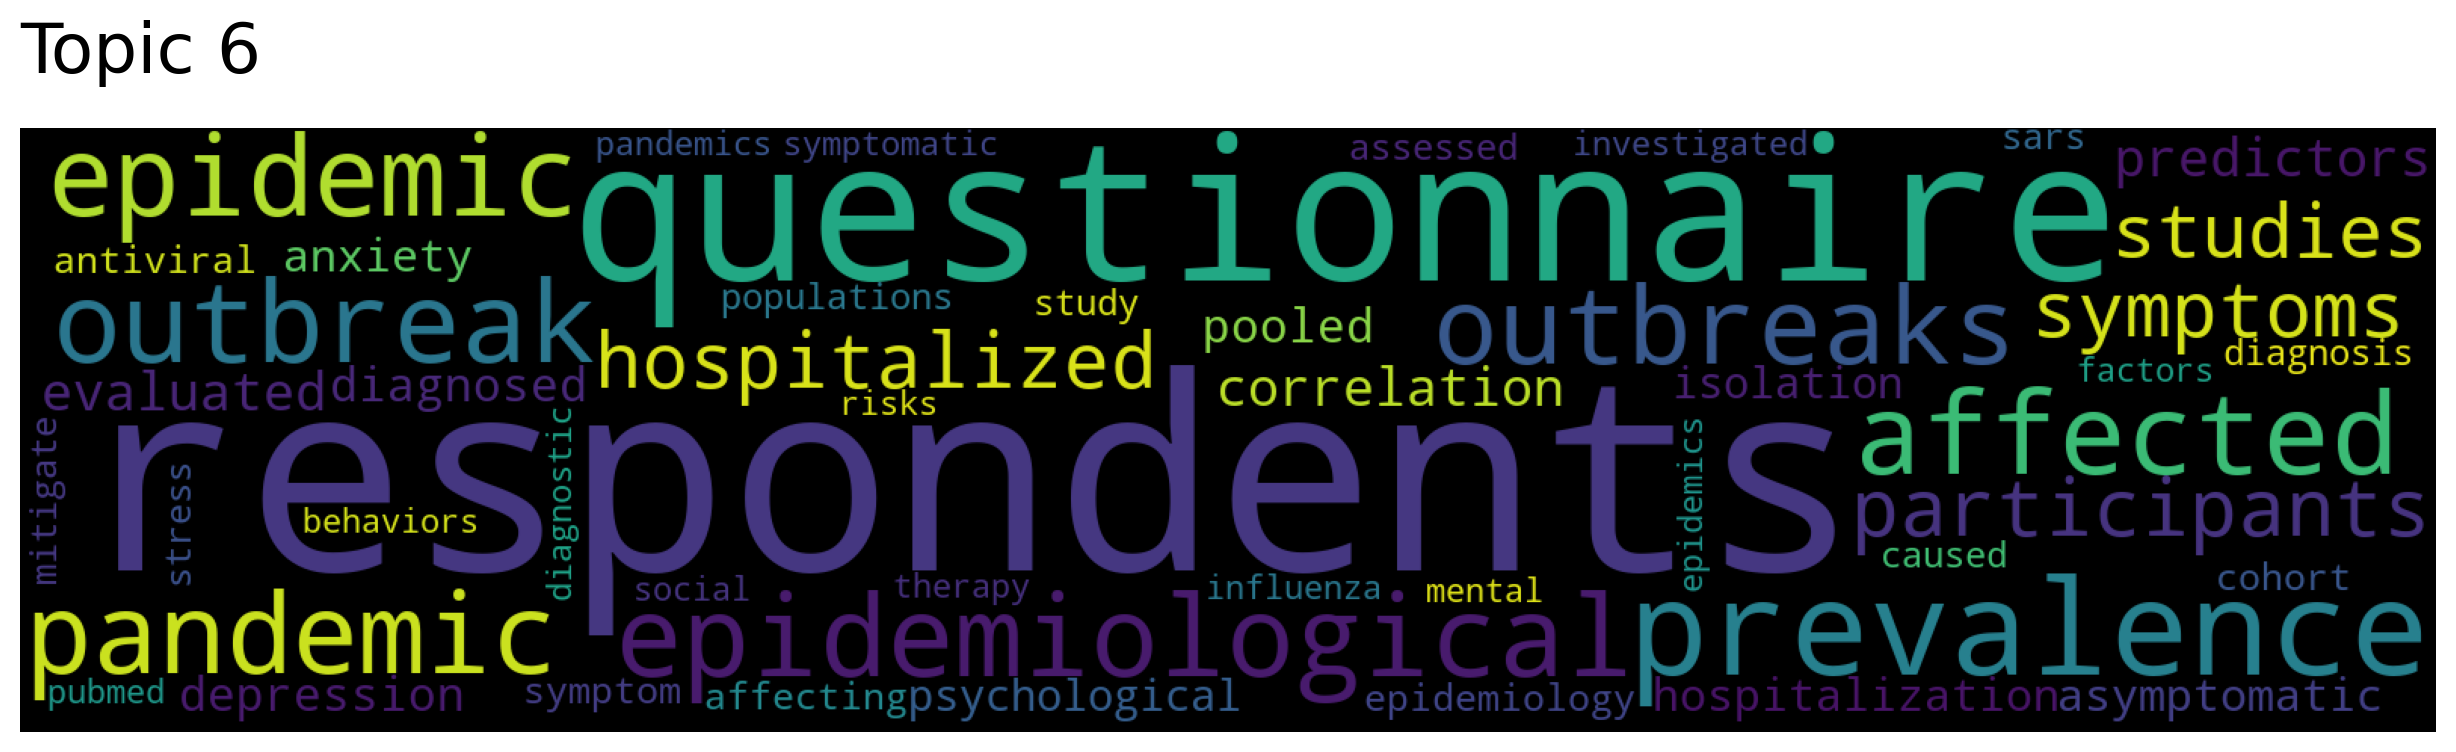

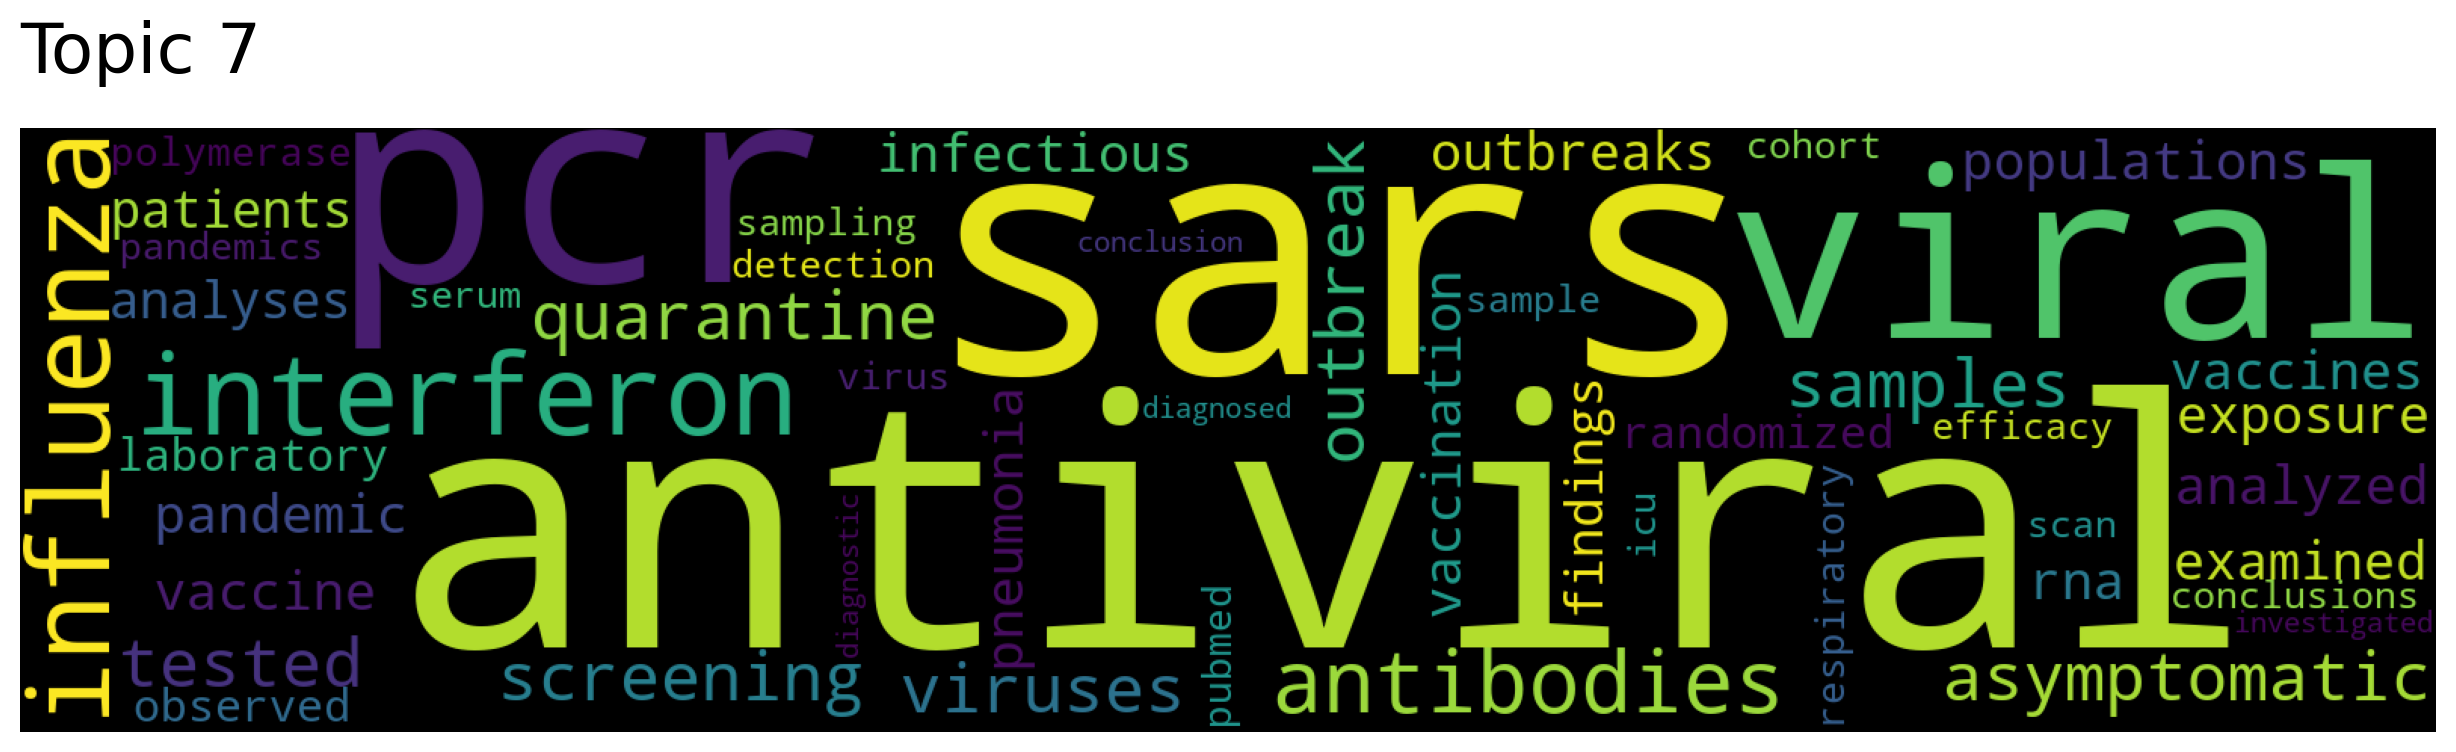

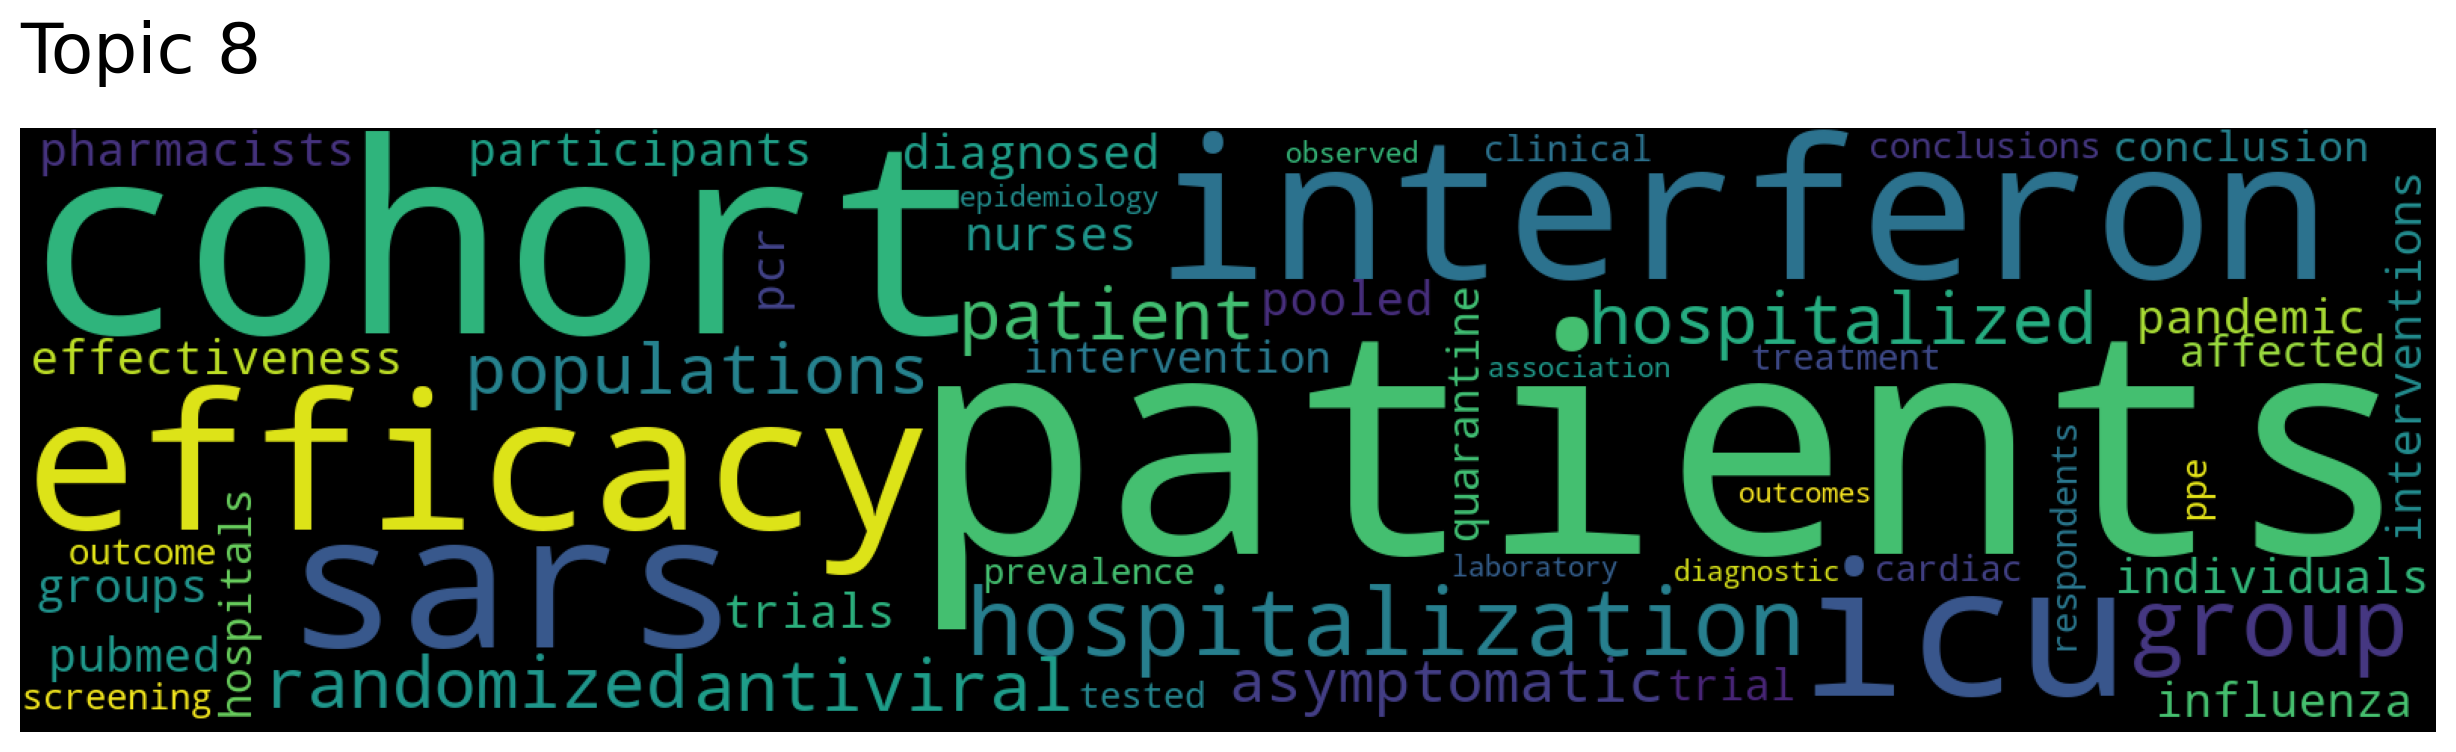

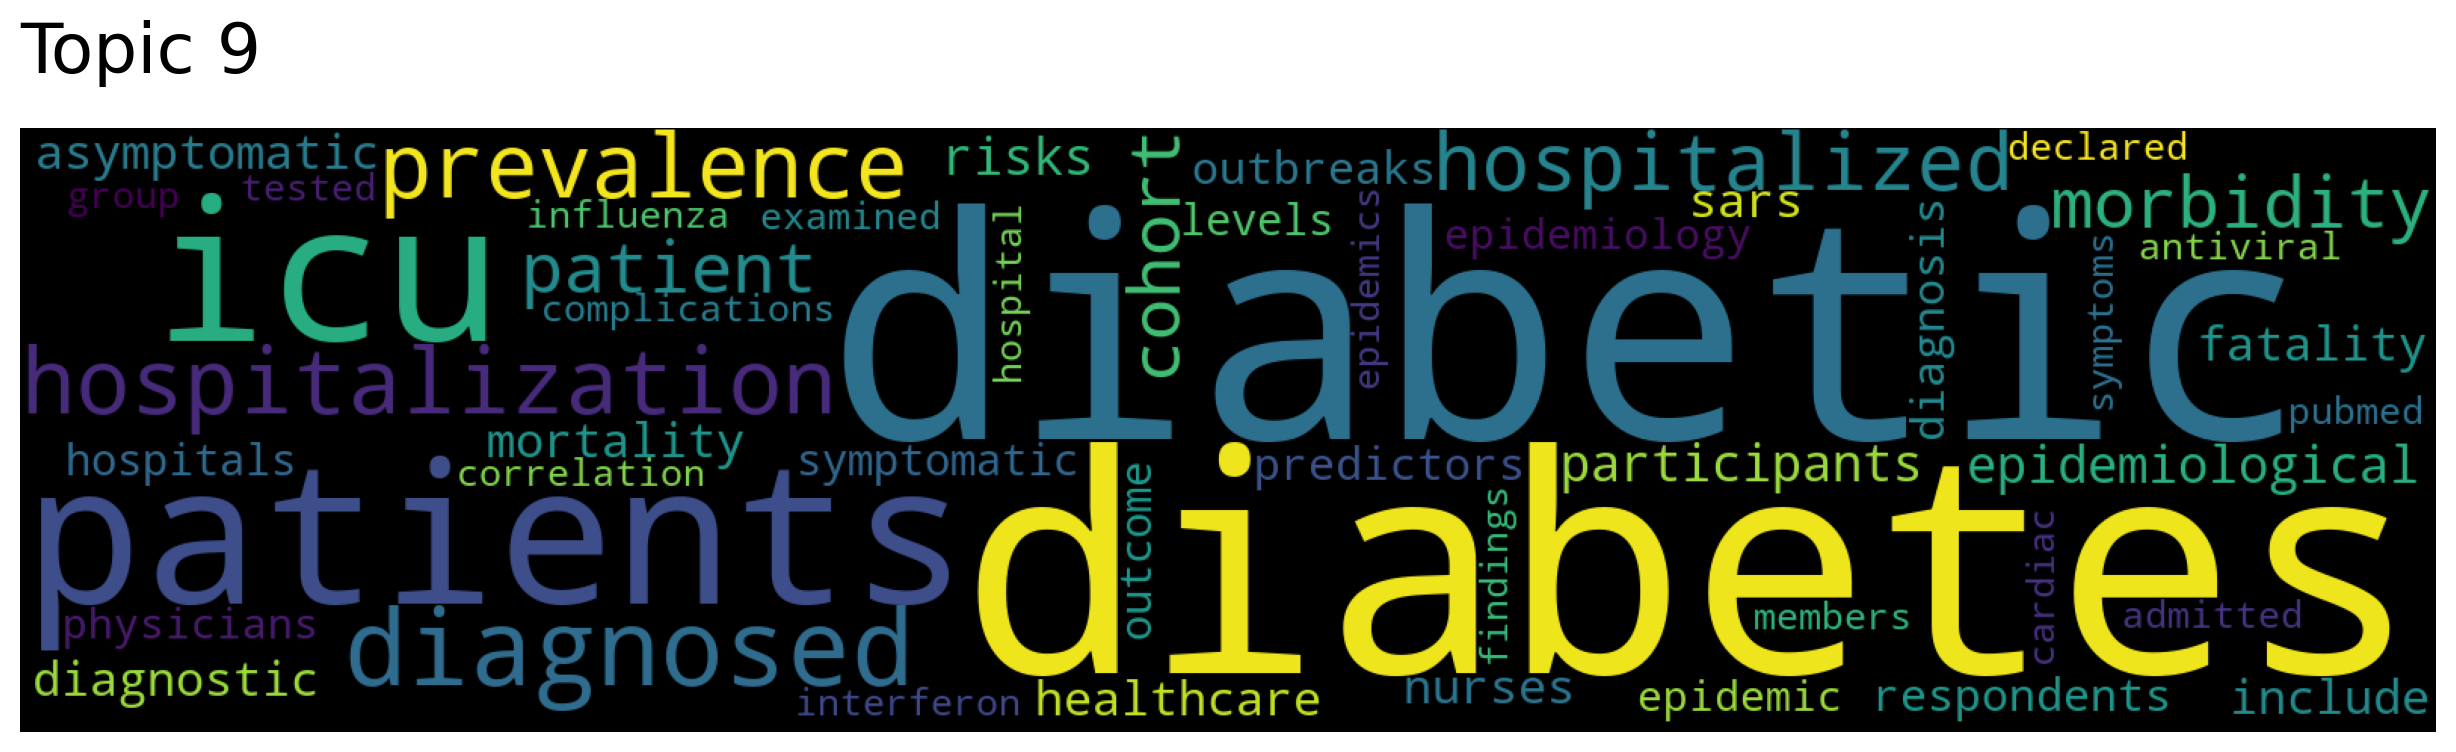

In [18]:
for topic in topic_nums:
  model.generate_topic_wordcloud(topic)